<a href="https://colab.research.google.com/github/Kostratana/logistic_optimization_genetic_ants_algorithms/blob/main/%22Clustering_and_ant_algorithm_Aidigo%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install osmnx

import osmnx as ox # Маршруты на графах
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Отрисовка изображений
import seaborn as sns # Надстройка визуализации над matplotlib
import networkx as nx # Для анализа и визуализации графовых структур
import folium # Для создания интерактивных карт
from itertools import cycle # Для создания итератора

In [ ]:
!pip -q install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy import spatial
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Рейсы17_22042023.xlsx to Рейсы17_22042023.xlsx


In [ ]:
with open('/content/Рейсы17_22042023.xlsx', 'rb') as f:
    df = pd.read_excel(f)

df = df[df['ДОЛГОТА'] > 53.]
df.dropna(inplace=True)
df.head(5)

,ДАТА,УИД_РЕЙСА,УИД_АВТОМОБИЛЯ,ВЕС,ОБЪЕМ,КОЛИЧЕСТВО_ПАЛЕТ,УИД_ВОДИТЕЛЯ,УИД_ДОКУМЕНТА,ВЕС_ДОКУМЕНТА,ОБЪЁМ_ДОКУМЕНТА,КОЛ_ВО_ПАЛЕТ_ДОКУМЕНТА,ДОЛГОТА,ШИРОТА,ПОРЯДОК_РАЗВОЗА
0,2023-04-17,10910622,58,5000,27.0,12,90021,10919764,363.28,0.539532,0.58,61.405797,55.263773,1
1,2023-04-17,10910622,58,5000,27.0,12,90021,10913393,263.52,0.358008,0.37,61.374230,55.148575,2
2,2023-04-17,10910622,58,5000,27.0,12,90021,10913360,252.24,0.341880,0.36,61.401736,55.171504,3
3,2023-04-17,10910622,58,5000,27.0,12,90021,10913368,259.44,0.357588,0.36,61.360503,55.189028,4
4,2023-04-17,10910622,58,5000,27.0,12,90021,10906288,10.00,0.050000,0.00,61.610442,55.116516,5


Муравьиный алгоритм по координатам доставки

In [ ]:
coordinates = [[61.405797	,55.263773 ], [61.374230, 55.148575], [61.401736, 55.171504] ,[61.360503, 55.189028]]

In [ ]:
import numpy as np

# Задаем координаты городов
coordinates = [[61.405797, 55.263773], [61.374230, 55.148575], [61.401736, 55.171504], [61.360503, 55.189028]]

# Вычисляем матрицу расстояний между городами
dist_matrix = np.zeros((len(coordinates), len(coordinates)))
for i in range(len(coordinates)):
    for j in range(len(coordinates)):
        dist_matrix[i][j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))

# Задаем количество муравьев
num_ants = 10

# Задаем количество итераций
num_iterations = 100

# Задаем параметры алгоритма
alpha = 1.0  # Влияние феромона
beta = 2.0  # Влияние расстояния
rho = 0.5   # Коэффициент испарения феромона

# Инициализируем феромоны на ребрах
pheromone = np.ones(dist_matrix.shape) / len(dist_matrix)

# Цикл по итерациям
for iteration in range(num_iterations):
    # Создаем пустой список для хранения путей муравьев
    ant_paths = []

    # Цикл по муравьям
    for ant in range(num_ants):
        # Выбираем начальный город для муравья
        start_city = np.random.randint(len(dist_matrix))

        # Создаем список посещенных городов
        visited_cities = [start_city]

        # Пока не посетили все города
        while len(visited_cities) < len(dist_matrix):
            # Вычисляем вероятности перехода в следующий город
            probs = []
            current_city = visited_cities[-1]

            for next_city in range(len(dist_matrix)):
                if next_city not in visited_cities:
                    pheromone_level = pheromone[current_city][next_city]
                    distance = dist_matrix[current_city][next_city]
                    prob = (pheromone_level ** alpha) * ((1.0 / distance) ** beta)
                    probs.append(prob)
                else:
                    probs.append(0.0)

            # Нормализуем вероятности
            probs = np.array(probs) / sum(probs)

            # Выбираем следующий город на основе вероятностей
            next_city = np.random.choice(range(len(dist_matrix)), p=probs)

            # Добавляем следующий город в список посещенных
            visited_cities.append(next_city)

        # Добавляем путь муравья в список путей
        ant_paths.append(visited_cities)

    # Обновляем феромоны на ребрах
    delta_pheromone = np.zeros(dist_matrix.shape)

    for path in ant_paths:
        for i in range(len(path) - 1):
            current_city = path[i]
            next_city = path[i+1]
            delta_pheromone[current_city][next_city] += 1.0 / dist_matrix[current_city][next_city]

    pheromone = (1.0 - rho) * pheromone + delta_pheromone

# Находим лучший путь
best_path = ant_paths[np.argmin([sum([dist_matrix[path[i]][path[i+1]] for i in range(len(path)-1)]) for path in ant_paths])]

print("Лучший путь:", best_path)


Лучший путь: [2, 1, 3, 0]


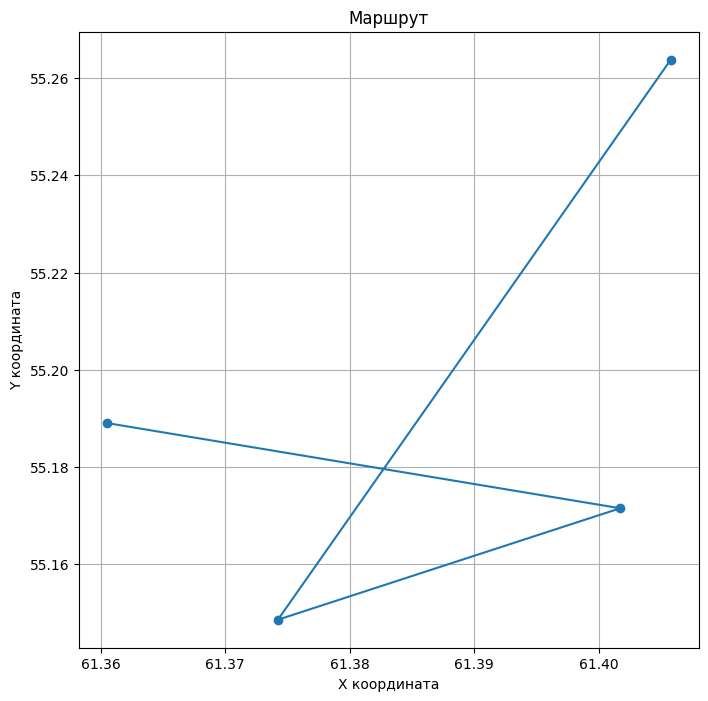

In [ ]:
import matplotlib.pyplot as plt

# Задаем координаты маршрута
coordinates = [[61.405797	,55.263773 ], [61.374230, 55.148575], [61.401736, 55.171504] ,[61.360503, 55.189028]]

# Создаем списки координат x и y
x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

# Создаем график
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o-')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Маршрут')
plt.grid(True)
plt.show()
